In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
def GraphClique(graph,k):
    
    n = (len(graph.nodes()))
    
    # creating G'
    G = InvertEdges(graph,n)
    
    nodesToRemove = GraphVertexCover(G,n-k)
    
    for n in nodesToRemove:
        G.remove_node(n)

    return G.nodes()

def InvertEdges(graph,n):
    new_edges = []
    G = nx.DiGraph()
    v = list(graph.nodes())
    
    for x in range(0,n):
        for y in range(x,n):
            if v[x] != v[y]:
                if (v[x],v[y]) in graph.edges() or (v[y],v[x]) in graph.edges():
                    continue
                new_edges.append((v[x],v[y]))
    
    G.add_edges_from(new_edges)
        
    return G

def GraphVertexCover(graph,k=None):
    
    allSubsets = []
    current_best = list(graph.nodes())
    AllSubsets(current_best, np.zeros(len(current_best), dtype=int), allSubsets)
    
    for sub in allSubsets:
        if k == None:
            if CoverAll(graph,sub) and len(sub) < len(current_best):
                current_best = sub   
        else:
            if CoverAll(graph,sub) and len(sub) == k:
                current_best = sub   

    return current_best

def IsThreeColorable(graph):
    
    n = (len(graph.nodes()))
    G2 = InvertEdges(graph,n)
    
    nodes = GraphClique(G2,3)
    
    return (len(nodes) > 0)

def CoverAll(graph,subset):
    
    if len(subset) == 0:
        return False
    
    edges = list(graph.edges())
    
    for edge in edges:
        if edge[0] not in subset and edge[1] not in subset:
            return False
    
    return True

def AllSubsets(w, x, allSets, index=0):
    
    if(index == len(w)):
        allSets.append(GetSet(w,x))
    else:
        x[index] = 0
        AllSubsets(w, x, allSets, index+1)
        x[index] = 1
        AllSubsets(w, x, allSets, index+1)
    
    return allSets

def GetSet(w, x):
    setW = []
    for i in range(0,len(x)):
        if x[i] == 1:
            setW.append(w[i])
    return setW

def PrintGraph(G,re,rn,be,bn):
    #val_map = {1: 3.0, 3: 1.0, 5: 0.0}
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, nodelist=rn, cmap=plt.get_cmap('jet'),node_color = "#FF9A00", node_size = 500)
    nx.draw_networkx_nodes(G, pos, nodelist=bn, cmap=plt.get_cmap('jet'),node_color = "#EBEBEB", node_size = 500)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edgelist=re, edge_color='#FF9A00', arrows=False)
    nx.draw_networkx_edges(G, pos, edgelist=be, arrows=False)
    plt.show()

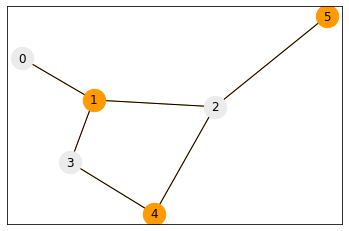

In [317]:
G = nx.DiGraph()
G.add_edges_from([(0,1),(1,2),(1,3),(2,4),(2,5),(3,4)])

nodes = GraphVertexCover(G)
black_nodes = [node for node in G.nodes() if node not in nodes]

PrintGraph(G,G.edges(),nodes,G.edges(),black_nodes)

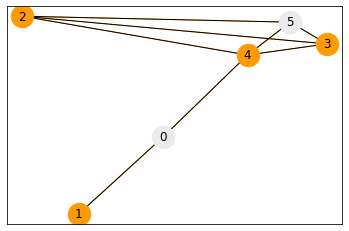

In [329]:
G = nx.DiGraph()
G.add_edges_from([(0,1),(0,4),(4,5),(4,2),(4,3),(5,3),(5,2),(3,2)])

nodes = GraphVertexCover(G)
black_nodes = [node for node in G.nodes() if node not in nodes]

PrintGraph(G,G.edges(),nodes,G.edges(),black_nodes)

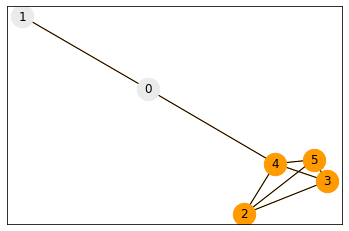

In [337]:
G = nx.DiGraph()
G.add_edges_from([(0,1),(0,4),(4,5),(4,2),(4,3),(5,3),(5,2),(3,2)])

nodes = GraphClique(G,4)
black_nodes = [node for node in G.nodes() if node not in nodes]

PrintGraph(G,G.edges(),nodes,G.edges(),black_nodes)

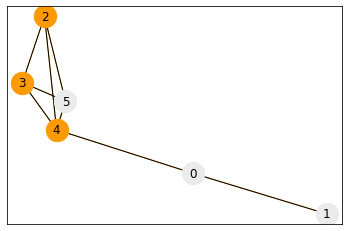

In [18]:
G = nx.DiGraph()
G.add_edges_from([(0,1),(0,4),(4,5),(4,2),(4,3),(5,3),(5,2),(3,2)])

nodes = GraphClique(G,3)
black_nodes = [node for node in G.nodes() if node not in nodes]

PrintGraph(G,G.edges(),nodes,G.edges(),black_nodes)

In [3]:
G = nx.DiGraph()
G.add_edges_from([(0,3),(0,4),(1,2),(1,6),(2,8),(2,5),(3,6),(3,7),(4,5),(4,8),(5,8),(6,7)])

print(IsThreeColorable(G))

True


In [4]:
G = nx.DiGraph()
G.add_edges_from([(0,1),(0,2),(0,5),(0,6),(1,2),(1,3),(2,3),(2,5),(3,4),(4,5),(4,6),(5,6)])

print(IsThreeColorable(G))

False
